一、导入数据

In [1]:
import pandas as pd

df = pd.read_csv('resou_original_preprocess.csv')

df = df.sort_values(by=['number','rank'],ascending=[True,True])

df.head()

,number,rank,time_id,title,label,上榜时间,最后时间,life_span,date,date_date,date_time
47,1,1,586,宿舍放布娃娃被通报批评,3.0,2019-10-26 10:24:01,2019-10-26 20:10:02,35161,2019-10-26 12:00:02,2019-10-26,12:00:02
28,1,2,586,王俊凯王源工作室包场少年的你,4.0,2019-10-26 11:24:02,2019-10-26 20:58:01,34439,2019-10-26 12:00:02,2019-10-26,12:00:02
22,1,3,586,权志龙退伍,4.0,2019-10-26 07:18:01,2019-10-26 18:08:01,39000,2019-10-26 12:00:02,2019-10-26,12:00:02
43,1,4,586,全明星版野狼DISCO,3.0,2019-10-26 09:52:01,2019-10-26 18:56:01,32640,2019-10-26 12:00:02,2019-10-26,12:00:02
12,1,5,586,黑粉冒充肖战小号,4.0,2019-10-26 10:58:02,2019-10-26 18:02:01,25439,2019-10-26 12:00:02,2019-10-26,12:00:02


In [2]:
df.shape

(40038, 11)

二、筛选样本，有一部分没来得及编码完。保留number为奇数、时间在

In [3]:
df = df.loc[df['number'].isin([i for i in range(1,819,2)])]

df = df.loc[df['date_date']< '2020-10-26']

df.head()

,number,rank,time_id,title,label,上榜时间,最后时间,life_span,date,date_date,date_time
47,1,1,586,宿舍放布娃娃被通报批评,3.0,2019-10-26 10:24:01,2019-10-26 20:10:02,35161,2019-10-26 12:00:02,2019-10-26,12:00:02
28,1,2,586,王俊凯王源工作室包场少年的你,4.0,2019-10-26 11:24:02,2019-10-26 20:58:01,34439,2019-10-26 12:00:02,2019-10-26,12:00:02
22,1,3,586,权志龙退伍,4.0,2019-10-26 07:18:01,2019-10-26 18:08:01,39000,2019-10-26 12:00:02,2019-10-26,12:00:02
43,1,4,586,全明星版野狼DISCO,3.0,2019-10-26 09:52:01,2019-10-26 18:56:01,32640,2019-10-26 12:00:02,2019-10-26,12:00:02
12,1,5,586,黑粉冒充肖战小号,4.0,2019-10-26 10:58:02,2019-10-26 18:02:01,25439,2019-10-26 12:00:02,2019-10-26,12:00:02


In [4]:
df.shape

(17888, 11)

三、查看每一个label的数量，画图

In [21]:
a = df['label'].value_counts(normalize=True) * 100

In [22]:
a = a.sort_index()

a

1.0    10.230322
2.0    22.501118
3.0    37.349061
4.0    29.919499
Name: label, dtype: float64

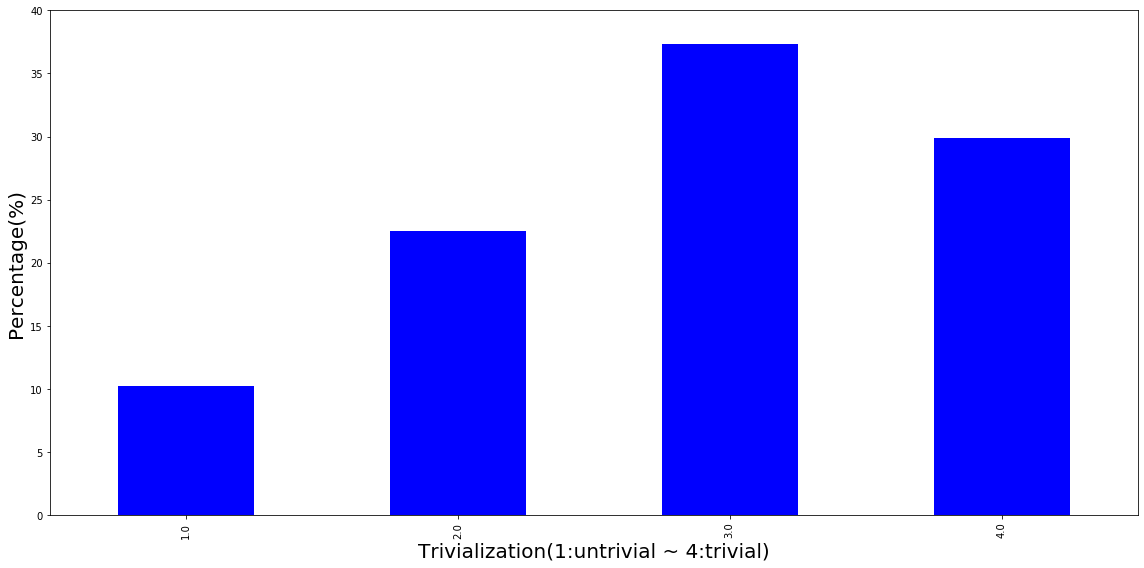

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

a.plot.bar(x="Trivialization",y="Percentage",color='blue',width=0.5)

plt.ylabel('Percentage(%)',fontsize=20.0)
plt.xlabel('Trivialization(1:untrivial ~ 4:trivial)',fontsize=20.0)


plt.ylim(0,40)

plt.tight_layout()
plt.show()

四、看标题长度，每一类话题的标题长度，画图

In [8]:
df['charCount'] = df['title'].str.len()

df.head()

,number,rank,time_id,title,label,上榜时间,最后时间,life_span,date,date_date,date_time,charCount
47,1,1,586,宿舍放布娃娃被通报批评,3.0,2019-10-26 10:24:01,2019-10-26 20:10:02,35161,2019-10-26 12:00:02,2019-10-26,12:00:02,11
28,1,2,586,王俊凯王源工作室包场少年的你,4.0,2019-10-26 11:24:02,2019-10-26 20:58:01,34439,2019-10-26 12:00:02,2019-10-26,12:00:02,14
22,1,3,586,权志龙退伍,4.0,2019-10-26 07:18:01,2019-10-26 18:08:01,39000,2019-10-26 12:00:02,2019-10-26,12:00:02,5
43,1,4,586,全明星版野狼DISCO,3.0,2019-10-26 09:52:01,2019-10-26 18:56:01,32640,2019-10-26 12:00:02,2019-10-26,12:00:02,11
12,1,5,586,黑粉冒充肖战小号,4.0,2019-10-26 10:58:02,2019-10-26 18:02:01,25439,2019-10-26 12:00:02,2019-10-26,12:00:02,8


In [9]:
df.charCount.describe()

count    17888.000000
mean        10.065854
std          3.961635
min          2.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         25.000000
Name: charCount, dtype: float64

In [10]:
df.groupby('label')['charCount'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
1.0,1830.0,13.304372,3.136712,2.0,12.0,14.0,16.0,23.0
2.0,4025.0,12.520497,3.477868,2.0,11.0,13.0,15.0,22.0
3.0,6681.0,9.516090,3.649840,2.0,7.0,10.0,12.0,23.0
4.0,5352.0,7.798767,3.120404,2.0,5.0,8.0,10.0,25.0


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


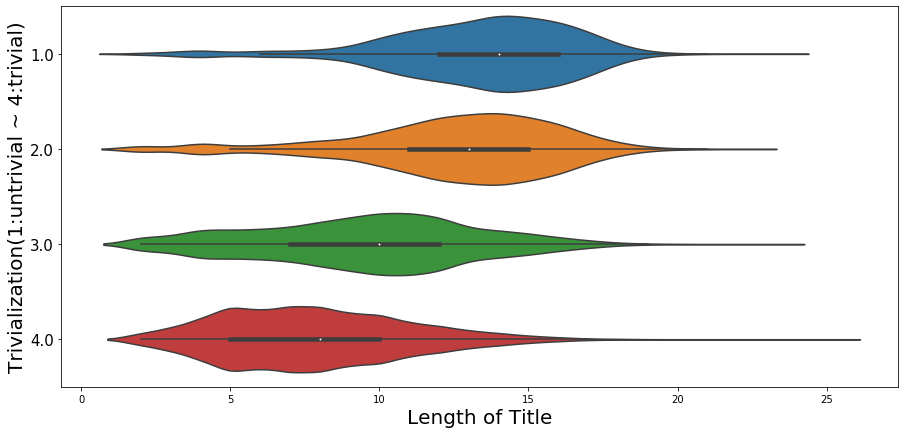

In [11]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.violinplot('charCount','label',data=df,orient='h')
plt.xlabel('Length of Title',fontsize=20.0)
plt.ylabel('Trivialization(1:untrivial ~ 4:trivial)',fontsize=20.0)

plt.yticks(fontsize=15.0)
plt.show()

五、看存活周期，并且看每一类话题的存活周期，画图

In [12]:
df.life_span.describe()

count    17888.000000
mean     28780.475794
std      18243.861433
min          0.000000
25%      15120.000000
50%      24839.000000
75%      39960.000000
max      86280.000000
Name: life_span, dtype: float64

In [13]:
df.groupby('label')['life_span'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
1.0,1830.0,26432.994536,18604.442731,359.0,13590.5,21600.0,30960.75,86041.0
2.0,4025.0,26459.190559,18006.588065,0.0,13680.0,21479.0,35039.00,86280.0
3.0,6681.0,26595.446191,17591.713103,1.0,13560.0,22679.0,35880.00,86280.0
4.0,5352.0,34056.493460,18010.717092,0.0,21840.0,31080.0,46560.25,86280.0


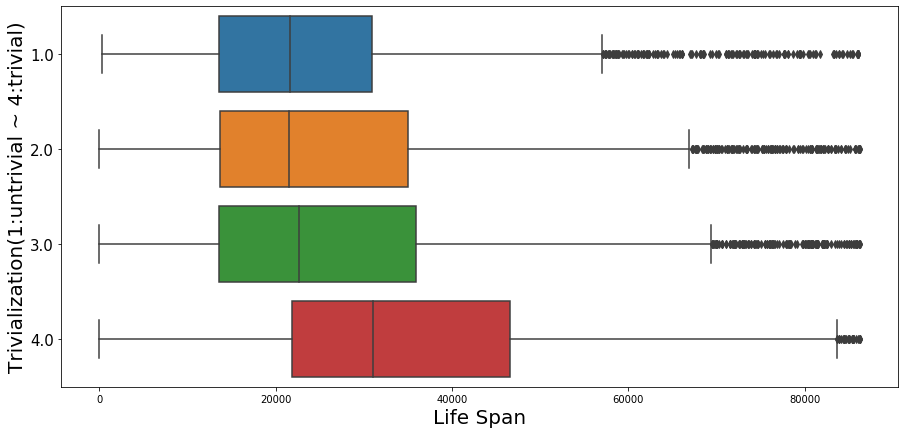

In [14]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.boxplot('life_span','label',data=df,orient='h')
plt.xlabel('Life Span',fontsize=20.0)
plt.ylabel('Trivialization(1:untrivial ~ 4:trivial)',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()

六、看内容-词云

In [15]:
import jieba

stopwords = [line.strip() for line in open('hit_stopwords.txt',encoding='utf8').readlines()]
df['title_cut'] = df['title'].astype(str).apply(lambda x : [i for i in jieba.cut(x) if i not in stopwords])
df['title_cut'] = df.title_cut.apply(lambda x: ' '.join(x))
df.head(10)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jr/wmjlnd2d5qdc8w6gdxb7gk140000gn/T/jieba.cache
Loading model cost 0.935 seconds.
Prefix dict has been built successfully.


,number,rank,time_id,title,label,上榜时间,最后时间,life_span,date,date_date,date_time,charCount,title_cut
47,1,1,586,宿舍放布娃娃被通报批评,3.0,2019-10-26 10:24:01,2019-10-26 20:10:02,35161,2019-10-26 12:00:02,2019-10-26,12:00:02,11,宿舍 放 布娃娃 通报批评
28,1,2,586,王俊凯王源工作室包场少年的你,4.0,2019-10-26 11:24:02,2019-10-26 20:58:01,34439,2019-10-26 12:00:02,2019-10-26,12:00:02,14,王俊凯 王源 工作室 包场 少年
22,1,3,586,权志龙退伍,4.0,2019-10-26 07:18:01,2019-10-26 18:08:01,39000,2019-10-26 12:00:02,2019-10-26,12:00:02,5,权志龙 退伍
43,1,4,586,全明星版野狼DISCO,3.0,2019-10-26 09:52:01,2019-10-26 18:56:01,32640,2019-10-26 12:00:02,2019-10-26,12:00:02,11,全明星 版 野狼 DISCO
12,1,5,586,黑粉冒充肖战小号,4.0,2019-10-26 10:58:02,2019-10-26 18:02:01,25439,2019-10-26 12:00:02,2019-10-26,12:00:02,8,黑粉 冒充 肖战 小号
15,1,6,586,李银河赞少年的你,4.0,2019-10-26 11:36:02,2019-10-26 19:52:01,29759,2019-10-26 12:00:02,2019-10-26,12:00:02,8,李银河 赞 少年
2,1,7,586,巴西总统宣布将对中国游客免签,1.0,2019-10-26 10:48:01,2019-10-26 15:40:02,17521,2019-10-26 12:00:02,2019-10-26,12:00:02,14,巴西 总统 宣布 中国 游客 免签
38,1,8,586,章莹颖家人起诉美国学校,2.0,2019-10-26 07:54:01,2019-10-26 23:28:01,56040,2019-10-26 12:00:02,2019-10-26,12:00:02,11,章莹颖 家人 起诉 美国 学校
23,1,9,586,日本天价柿子两个5万元,2.0,2019-10-26 09:40:01,2019-10-26 16:50:01,25800,2019-10-26 12:00:02,2019-10-26,12:00:02,11,日本 天价 柿子 两个 5 万元
26,1,10,586,死亡卡车遇难者中或有一名越南女性,1.0,2019-10-26 10:04:02,2019-10-26 17:56:01,28319,2019-10-26 12:00:02,2019-10-26,12:00:02,16,死亡 卡车 遇难者 中 一名 越南 女性


1）整体的词云

新冠 0.1310165081695101
肺炎 0.07776949440507293
特朗普 0.06669718019552358
病例 0.06005175596493007
疫情 0.05577537202906
武汉 0.05298072815832039
口罩 0.05002980129025927
美国 0.042040762300533246
女生 0.03340142536379734
中国 0.03326000481786156
韩国 0.023849969068962133
湖北 0.023495913250147216
北京 0.023285478108441972
千玺 0.021510172983053896
病毒 0.02123292389941932
王一博 0.021184261271189445
男子 0.02093452002793817
郑爽 0.0193270238066574
学生 0.01901139828391592
香港 0.01885558697301873
肖战 0.01857696757627382
李佳琦 0.01857696757627382
钟南山 0.01766515038442927
女孩 0.017297369731110113
粉丝 0.017269657091820836
开学 0.0170809773441163
患者 0.016959617394304412
女子 0.016215149206197214
体验 0.01600843311642894
日本 0.015694954318603637
全国 0.015524074877991331
世卫 0.015456828728666066
朋友圈 0.014670223862727297
通报 0.01456368953351599
医院 0.013905416790776967
高校 0.013418295729562718
妈妈 0.01340335489400507
视频 0.013398902083676563
警方 0.013325439382214498
造型 0.013269457851515227
徐坤 0.013036468474578119
男生 0.012694028090919277
封面 0.012646840

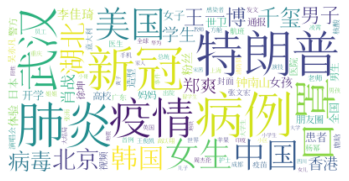

In [16]:
word_list = []
for row in df.title_cut:
    word_list.append(row)

word_list = ' '.join(word_list)

# word_list


import jieba.analyse
# jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
# sentence ：为待提取的文本
# topK： 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
# withWeight ： 为是否一并返回关键词权重值，默认值为 False
# allowPOS ： 仅包括指定词性的词，默认值为空，即不筛选

keywords = jieba.analyse.extract_tags(word_list, topK=100, withWeight=True, allowPOS=('n','nr','ns'))
key = []

for item in keywords:
    print(item[0],item[1])
    key.append(item[0])
    
myfont = 'ShangShouJianSongXianXiTi-2.ttf'

from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False,
                      stopwords=stopwords,
                      background_color="white",
                      font_path = myfont,
                      ).generate(' '.join(key))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#画图，在词云图片上单机鼠标右键，用“图片另存为”功能导出

wordcloud.to_file('词云.png')
#以png或jpg格式保存

2）每一种label的词云

新冠 0.8158834964385193
肺炎 0.5022890240368614
特朗普 0.47166363345903217
病例 0.42317900202333525
美国 0.2660478019878774
疫情 0.16213628311077694
病毒 0.12870278138554078
钟南山 0.1210791743228745
张文宏 0.08758071430695971
感染者 0.0705713794619973
韩国 0.06960581735438597
口罩 0.06730765234285714
疫苗 0.06290108678475997
首例 0.05963568087838056
湖北 0.059249592856198185
武汉 0.05874534502356854
患者 0.05751918868030075
中国 0.052527253094158476
世卫 0.048580591187044525
病毒检测 0.04512609629689608
全国 0.04299790141729517
白宫 0.034382382996992485
阳性 0.03429689078145749
总统 0.03335191852777328
北京 0.033293596572708695
香港 0.02801289688982071
广东 0.027659150845330632
省区市 0.026854072694709852
出院 0.02677562159830345
伊朗 0.026335255672018505
本土 0.02612154261098901
纽约 0.024654059005604398
地图 0.02405492402647773
日本 0.02316319035826489
华春莹 0.023047556396568344
李兰娟 0.023047556396568344
抗议者 0.023047556396568344
留学生 0.022214849748270676
纽约州 0.021992431457027183
航班 0.021610433565789473
浙江 0.02098059618905726
全球 0.020791405818619626
意大利 0.02045

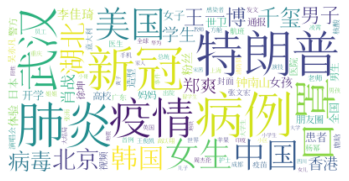

In [17]:
df1 = df[df['label']==1]

word_list1 = []
for row in df1.title_cut:
    word_list1.append(row)

word_list1 = ' '.join(word_list1)


import jieba.analyse
# jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
# sentence ：为待提取的文本
# topK： 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
# withWeight ： 为是否一并返回关键词权重值，默认值为 False
# allowPOS ： 仅包括指定词性的词，默认值为空，即不筛选

keywords = jieba.analyse.extract_tags(word_list1, topK=100, withWeight=True, allowPOS=('n','nr','ns'))
key = []

for item in keywords:
    print(item[0],item[1])
    key.append(item[0])
    
myfont = 'ShangShouJianSongXianXiTi-2.ttf'

from wordcloud import WordCloud
wordcloud1 = WordCloud(collocations=False,
                      stopwords=stopwords,
                      background_color="white",
                      font_path = myfont,
                      ).generate(' '.join(key))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#画图，在词云图片上单机鼠标右键，用“图片另存为”功能导出

wordcloud1.to_file('词云-1.png')
#以png或jpg格式保存

武汉 0.14116528795867517
口罩 0.07568150283608417
疫情 0.06292730490269478
北京 0.05066927282979729
香港 0.05025366761485253
男子 0.04982887021197041
警方 0.044855826956088
湖北 0.04364592387412816
中国 0.04246217890790278
开学 0.04187328390294553
通报 0.039591256978247676
女子 0.03893170328933039
韩国 0.03735402975709482
新冠 0.036752095311057734
学生 0.03598936674270343
核酸 0.03555045570944087
女孩 0.03370475380244692
医院 0.03266817775018349
高校 0.031782169484320305
患者 0.028053042186277265
全国 0.02780907069729369
医生 0.026715249071860885
教育部 0.025885410636579884
航班 0.02567964768712172
男孩 0.02462805667928235
暴雨 0.023246806364425016
方舱 0.022970059569411082
建议 0.021612042538548374
教师 0.02142456285680373
员工 0.021285851833488325
火神 0.02062310926724565
肺炎 0.02036339348585263
号房 0.01952455063399942
杭州 0.018949386565329043
女生 0.01867054487111442
护士 0.018372790772285524
大学生 0.018006300927178406
地震 0.01763506669131905
成都 0.01729604207191853
视频 0.017029198882570852
广东 0.016779394220605245
小区 0.016580478809249687
南京 0.0163675852557

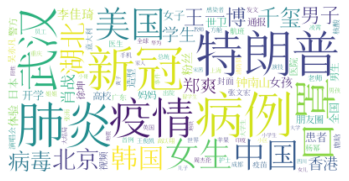

In [18]:
df2 = df[df['label']==2]

word_list2 = []
for row in df2.title_cut:
    word_list2.append(row)

word_list2 = ' '.join(word_list2)


import jieba.analyse
# jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
# sentence ：为待提取的文本
# topK： 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
# withWeight ： 为是否一并返回关键词权重值，默认值为 False
# allowPOS ： 仅包括指定词性的词，默认值为空，即不筛选

keywords = jieba.analyse.extract_tags(word_list2, topK=100, withWeight=True, allowPOS=('n','nr','ns'))
key = []

for item in keywords:
    print(item[0],item[1])
    key.append(item[0])
    
myfont = 'ShangShouJianSongXianXiTi-2.ttf'

from wordcloud import WordCloud
wordcloud2 = WordCloud(collocations=False,
                      stopwords=stopwords,
                      background_color="white",
                      font_path = myfont,
                      ).generate(' '.join(key))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#画图，在词云图片上单机鼠标右键，用“图片另存为”功能导出

wordcloud.to_file('词云-2.png')
#以png或jpg格式保存

女生 0.08354857204908933
口罩 0.05206765627852098
体验 0.047556242400663896
疫情 0.04501858388450768
男生 0.03641376529459743
中国 0.034712941816292475
朋友圈 0.031194972889655174
日本 0.025789859576498545
妈妈 0.02505562021867553
老师 0.023830824924553386
学生 0.02346496130237474
苹果 0.02316291371473868
上海 0.022470679021110097
女孩 0.022328457184043207
美食 0.021919654475277106
小学生 0.021570886172530123
文案 0.02031495920624844
男朋友 0.0200673839674275
手机 0.020000087353276276
大学 0.018991984121479018
颜值 0.018873334653518904
原因 0.018515366557665145
小哥 0.018476577350843376
网红 0.01788000125070212
综艺 0.017819067422683837
小朋友 0.017082333156942252
迪士尼 0.016906524816638138
宿舍 0.016885802593385957
重庆 0.016663956566798505
硬核 0.016461400670627336
大学生 0.016196484404240964
世界 0.015967702022856668
世卫 0.01570341876737848
追星 0.015319368183838803
深圳 0.01530623465197175
高三 0.015108345818206064
开学 0.0150899810326049
意大利 0.015036366723542171
湖人 0.014900001042251766
消防员 0.014880102967544662
情侣 0.014859059772543416
视频 0.014728452942972996

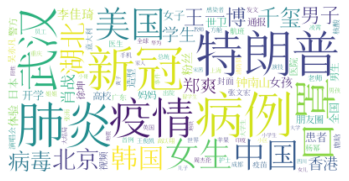

In [19]:
df3 = df[df['label']==3]

word_list3 = []
for row in df3.title_cut:
    word_list3.append(row)

word_list3 = ' '.join(word_list3)


import jieba.analyse
# jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
# sentence ：为待提取的文本
# topK： 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
# withWeight ： 为是否一并返回关键词权重值，默认值为 False
# allowPOS ： 仅包括指定词性的词，默认值为空，即不筛选

keywords = jieba.analyse.extract_tags(word_list3, topK=100, withWeight=True, allowPOS=('n','nr','ns'))
key = []

for item in keywords:
    print(item[0],item[1])
    key.append(item[0])
    
myfont = 'ShangShouJianSongXianXiTi-2.ttf'

from wordcloud import WordCloud
wordcloud3 = WordCloud(collocations=False,
                      stopwords=stopwords,
                      background_color="white",
                      font_path = myfont,
                      ).generate(' '.join(key))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


wordcloud3.to_file('词云-3.png')
#以png或jpg格式保存

千玺 0.0871839398001547
王一博 0.08586297101530387
郑爽 0.07833531052508289
肖战 0.07529522073649723
李佳琦 0.07529522073649723
粉丝 0.05764417344810609
徐坤 0.05283875139403315
封面 0.05125953226976354
吴亦凡 0.05019681382433149
造型 0.04976942850497017
杨幂 0.04887584503948066
鹿晗 0.046233907469779005
王俊凯 0.044912938684928176
高以翔 0.04359196990007735
姐姐 0.03746738217747182
大结局 0.03733572915517127
凌霄 0.037165158476353585
张雨 0.03685974464053038
演唱会 0.036589597418795576
宋茜 0.035666157190972374
演技 0.03553778581321547
黄子 0.034916379338585636
张艺兴 0.034345188406121545
李宇春 0.033598204276773486
朱一龙 0.033024219621270716
刘雨昕 0.033024219621270716
周杰伦 0.03105530554293923
街舞 0.03038228205156906
赵丽颖 0.029061313266718233
李荣浩 0.029061313266718233
李尖 0.029061313266718233
发文 0.027925855774050826
荣耀 0.027900609991482868
吴磊 0.027740344481867404
罗志祥 0.027740344481867404
虞书欣 0.027740344481867404
刘诗 0.027728517011779006
王源 0.027656095670497236
迪丽 0.026419375697016575
热巴 0.026419375697016575
沈腾 0.026419375697016575
彭昱畅 0.0264193756970

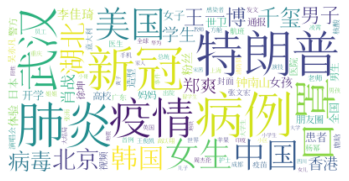

In [20]:
df4 = df[df['label']==4]

word_list4 = []
for row in df4.title_cut:
    word_list4.append(row)

word_list4 = ' '.join(word_list4)


import jieba.analyse
# jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
# sentence ：为待提取的文本
# topK： 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
# withWeight ： 为是否一并返回关键词权重值，默认值为 False
# allowPOS ： 仅包括指定词性的词，默认值为空，即不筛选

keywords = jieba.analyse.extract_tags(word_list4, topK=100, withWeight=True, allowPOS=('n','nr','ns'))
key = []

for item in keywords:
    print(item[0],item[1])
    key.append(item[0])
    
myfont = 'ShangShouJianSongXianXiTi-2.ttf'

from wordcloud import WordCloud
wordcloud4 = WordCloud(collocations=False,
                      stopwords=stopwords,
                      background_color="white",
                      font_path = myfont,
                      ).generate(' '.join(key))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud4.to_file('词云-4.png')
#以png或jpg格式保存

In [24]:
df.to_csv('resou_processed_final.csv',index=False)

